In [1]:
import os
import sys

import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec

get_ipython().magic(u'matplotlib inline')

sys.path.append('../3_analyze')
from containers import Dataset, Protein, LigandManager
from utils import heatmap
from parse_files import parse_mcss_size

sys.path.append('../1_dock')
from parse_chembl import load_chembl_raw, load_chembl_proc

In [3]:
data_dir = '/scratch/PI/rondror/jbelk/method/data'
glide_dir = 'docking/glide12'
ifp_dir = 'ifp/ifp1'
mcss_dir = 'mcss/mcss1'

In [6]:
prot = 'BRAF'
struct_dict = {'AR':'2PNU','A2AR':'2YDO','B1AR':'2VT4','B2AR':'2RH1','CHK1':'2BRN', 'PLK1':'2OWB',
               'VITD':'2HB7','BRAF':'3IDP','JAK2':'3KRR','CDK2':'1H1S','ERA':'1A52','GCR':'3K23'}

all_data = Dataset([prot], struct_dict, data_dir, glide_dir, ifp_dir, mcss_dir)

mcss_path = '{}/{}/{}/{}'.format(data, prot, mcss_dir, struct_dict[prot])

lm = all_data.proteins[prot].lm

In [8]:
col_ligs = lm.get_pdb()#['{}_lig'.format(l) for l in pdb_ligs]
row_ligs = lm.get_pdb()#['{}_lig'.format(l) for l in chembl_ligs[:200]]

In [ ]:
#all_data.load({prot:row_ligs+col_ligs}, load_fp=False)

In [9]:
mcss_info = parse_mcss_size(mcss_path, set(col_ligs), set(row_ligs))

In [10]:
def size(lig_id, mcss_sizes):
    lig_key = [a for a in mcss_sizes if lig_id in a]
    if len(lig_key) == 0:
        print lig_id
        return 1
    lig_key = lig_key[0]
    if lig_id == lig_key[0]:
        return mcss_sizes[lig_key][0]
    if lig_id == lig_key[1]:
        return mcss_sizes[lig_key][1]
    
def sort_by_mcss(lig_id, mcss_sizes):
    lig_key = [a for a in mcss_sizes if lig_id in a]
    tr = []
    for l1,l2 in lig_key:
        if lig_id == l1: tr.append((l2,mcss_sizes[(l1,l2)][2]))
        if lig_id == l2: tr.append((l1,mcss_sizes[(l1,l2)][2]))
    return tr

In [11]:
def heatmap(A, row_vals, col_vals, red=10.25):
    fig, ax = plt.subplots()
    
    sq_size = 0.2
    fig.set_size_inches(sq_size*A.shape[1]+2, sq_size*A.shape[0], forward=True)
    
    cmap = cm.jet
    cmap.set_under('black')

    heatmap = ax.pcolor(A, cmap=cmap, vmin=0, vmax=red)
    ax.set_xlim((0,A.shape[1]))
    ax.set_ylim((0,A.shape[0]))
    plt.colorbar(heatmap)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(A.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(A.shape[0]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    ax.set_xticklabels(col_vals, minor=False, rotation = 'vertical')
    ax.set_yticklabels(row_vals, minor=False)
    plt.tight_layout()
    plt.show()

1UWH_lig 32.0 [20.0, 13.0, 13.0, 13.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0]
2FB8_lig 34.0 [12.0, 11.0, 11.0, 9.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0]
3C4C_lig 27.0 [26.0, 24.0, 17.0, 17.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0]
3D4Q_lig 28.0 [24.0, 12.0, 11.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0]
3IDP_lig 35.0 [22.0, 13.0, 10.0, 10.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0]
3II5_lig 38.0 [19.0, 16.0, 16.0, 16.0, 15.0, 15.0, 13.0, 12.0, 12.0, 12.0]
3PPJ_lig 25.0 [13.0, 12.0, 10.0, 10.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3PPK_lig 30.0 [16.0, 16.0, 12.0, 11.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0]
3PRF_lig 24.0 [22.0, 16.0, 10.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0]
3PRI_lig 29.0 [22.0, 16.0, 10.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0]
3PSB_lig 26.0 [13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3PSD_lig 29.0 [8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3Q96_lig 39.0 [13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 11.0, 10.0, 10.0]
3SKC_lig 32.0 [20.0, 17.0, 15.0, 15.0, 15.0, 14.0, 14.0, 12.0, 12.0, 12.0]
3TV4_lig 26.0 

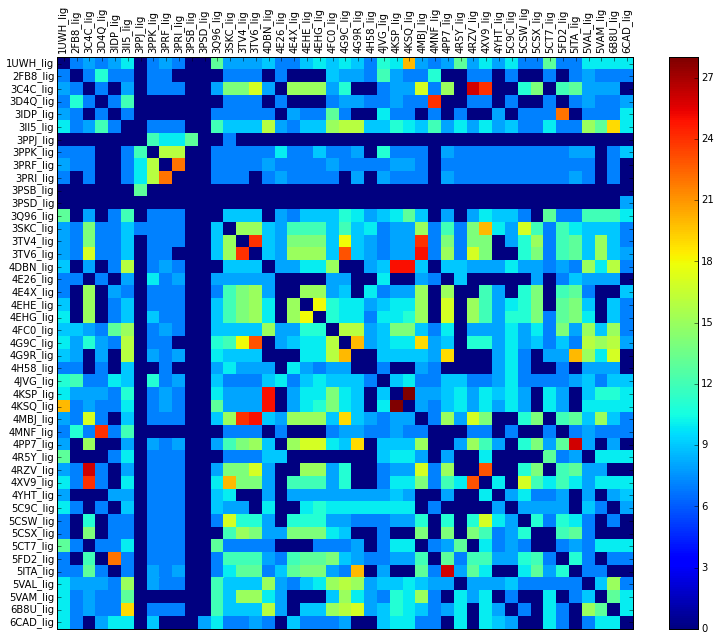

In [12]:
A = np.zeros((len(row_ligs), len(col_ligs)))
B = np.zeros((len(row_ligs), len(col_ligs)))

for i in range(len(row_ligs)):
    for j in range(len(col_ligs)):
        l1,l2 = row_ligs[i],col_ligs[j]
        
        #if i == j:
        #    A[i,j] = size(l1, mcss_info)
        #    B[i,j] = 1
        #    continue
        
        s1,s2,s3 = 1,1,0
        if (l1,l2) in mcss_info:
            s1,s2,s3 = mcss_info[(l1,l2)]
        if (l2,l1) in mcss_info:
            s1,s2,s3 = mcss_info[(l2,l1)]
            
        A[i,j] = s3
        B[i,j] = s3/min(s1,s2)#/float(s1+s2-s3)
        
for j in range(len(col_ligs)):
    print col_ligs[j], size(col_ligs[j], mcss_info), sorted(A[:,j],key=lambda x:-x)[:10]
    #print sorted(sort_by_mcss(col_ligs[j], mcss_info), key=lambda x:-x[1])[:3]
    

#ki = [chembl_info[x.split('_')[0]].ki for x in row_ligs]
heatmap(A, row_ligs, col_ligs, red=np.max(A))
#heatmap(B, row_ligs, col_ligs, red=np.max(B))